In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
from craft import craco, craco_kernels, craco_plan, uvfits
from craco import preprocess
from craco import craco_candidate

# Andy's candidate plots

In [3]:
cand_query_dict = {
    'sbid': '49744', 'beam': '02', 'dm': '172.638', 'lpix': '40', 'mpix': '214', 
    'ra': '279.758', 'dec': '-10.5304', 'totalsample': '74438', 'scan': '00', 
    'tstart': "20230428152550", 'results': 'results', 'boxcwidth': "6", 'npzfname': 
    'SB50705_B31_results_102_150_t2991.npz', 
    'uvfitspath': '/data/seren-03/big/craco/SB049744/scans/00/20230428152550/results/b02.uvfits', 
    'calpath': '/data/seren-01/big/craco/SB049744/cal/02/b02.aver.4pol.smooth.npy'
}

crow = {
    "ra_deg": float(cand_query_dict["ra"]), "dec_deg": float(cand_query_dict["dec"]),
    "dm_pccm3": float(cand_query_dict["dm"]), "total_sample": int(cand_query_dict["totalsample"]),
    "boxc_width": int(cand_query_dict["boxcwidth"]), 
    "lpix": int(cand_query_dict["lpix"]), "mpix": int(cand_query_dict["mpix"]),
}

cand = craco_candidate.Candidate(
    crow = crow,
    uvsource = cand_query_dict["uvfitspath"],
    calibration_file = cand_query_dict["calpath"],
    workdir="./test", padding=2, planargs="--ndm 2 --npix 256"
)

cand.search_output["obstime_sec"] = cand.search_output["total_sample"] * cand.tsamp

parsing values --ndm 2 --npix 256


/home/gup037/Codes/craft/src/craft/uvfits.py:269: UserWarning: Dont yet support multiple source files: 2 - using source at 2 which is (2, 'CRACO_ULP1_beam0', 0, '', 0.0, 0.0, 0.0, 0.0, 0.0, 119.99999999999982, 279.00128838450553, -11.271863057834889, 2000.0, 279.00128838450553, -11.271863057834889, 0.0, 0.0, 0.0, 0.0)
  warnings.warn(f'Dont yet support multiple source files: {len(source_table)} - using source at {first_targetidx} which is {row}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=515.0 2-3 uvpix=(0, 254)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=787.0 3-19 uvpix=(0, 211)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=787.0

Upper registers [(2, 1), (3, 1), (8, 1), (9, 1), (10, 1), (40, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1), (111, 1), (112, 1), (113, 1), (114, 1), (115, 1), (196, 1), (197, 1), (198, 1), (199, 1), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1)]
Lower registers [(2, 3), (2, 4), (4, 5), (3, 9), (4, 9), (4, 10), (7, 12), (7, 13), (8, 13), (8, 14), (7, 17), (7, 18), (7, 19), (8, 19), (13, 19), (14, 19), (7, 20), (8, 20), (14, 20), (15, 20), (1, 21), (7, 21), (12, 21), (13, 21), (15, 21), (20, 21), (1, 22), (4, 22), (7, 22), (8, 22), (13, 22), (15, 22)]


In [4]:
cand._calibrate_data(cand.calibration_file)
cand._rotate_vis()
cand._normalise_vis()
cand._load_burst_filterbank()
cand._normalise_vis(target=False)
cand._dedisperse_block(dm=cand.search_output["dm_pccm3"])

cand._grid_image_data()

In [5]:
cand.visrange

(74427, 74440)

<IPython.core.display.Javascript object>


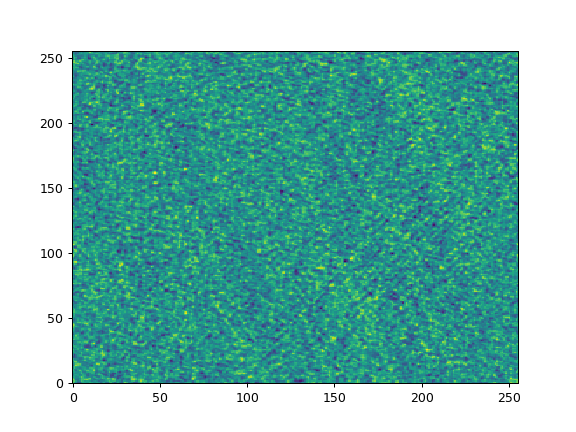

In [6]:
plt.figure()
plt.imshow(cand.imgcube[8], aspect='auto', interpolation='None', origin='lower')

<IPython.core.display.Javascript object>


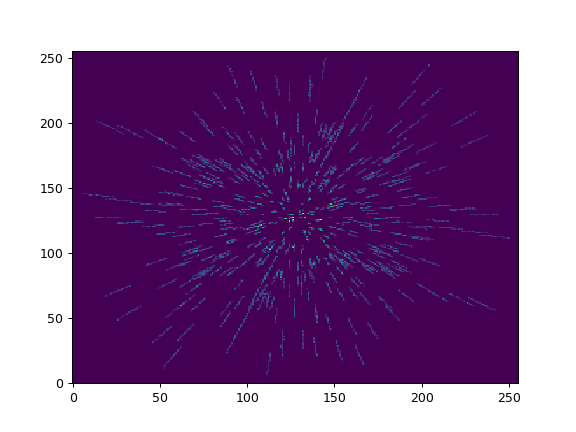

In [7]:
plt.figure()
plt.imshow(np.fft.fftshift(np.abs(cand.grid_data[..., 4])), aspect='auto', interpolation='None', origin='lower')

# Vivek's pretty_images

In [8]:
fname = "/home/gup037/tmp/b02.uvfits"  #ULP1 detection beam -- SB049744
calfile = cand_query_dict['calpath']
uvsource = uvfits.open(fname, skip_blocks=cand.visrange[0])
nt = cand.visrange[1] - cand.visrange[0] + 1

In [9]:
values = craco_plan.get_parser().parse_args([])
values.uv = fname
values.nt = nt

In [10]:
py_plan = craco_plan.PipelinePlan(uvsource, values)

/home/gup037/Codes/craft/src/craft/uvfits.py:269: UserWarning: Dont yet support multiple source files: 2 - using source at 2 which is (2, 'CRACO_ULP1_beam0', 0, '', 0.0, 0.0, 0.0, 0.0, 0.0, 119.99999999999982, 279.00128838450553, -11.271863057834889, 2000.0, 279.00128838450553, -11.271863057834889, 0.0, 0.0, 0.0, 0.0)
  warnings.warn(f'Dont yet support multiple source files: {len(source_table)} - using source at {first_targetidx} which is {row}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=515.0 2-3 uvpix=(0, 254)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=787.0 3-19 uvpix=(0, 211)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=787.0

Upper registers [(2, 1), (3, 1), (8, 1), (9, 1), (10, 1), (40, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1), (111, 1), (112, 1), (113, 1), (114, 1), (115, 1), (196, 1), (197, 1), (198, 1), (199, 1), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1)]
Lower registers [(2, 3), (2, 4), (4, 5), (3, 9), (4, 9), (4, 10), (7, 12), (7, 13), (8, 13), (8, 14), (7, 17), (7, 18), (7, 19), (8, 19), (13, 19), (14, 19), (7, 20), (8, 20), (14, 20), (15, 20), (1, 21), (7, 21), (12, 21), (13, 21), (15, 21), (20, 21), (1, 22), (4, 22), (7, 22), (8, 22), (13, 22), (15, 22)]


In [11]:
block_dtype = np.ma.core.MaskedArray
gridder = craco_kernels.Gridder(uvsource, py_plan, values)
imager = craco_kernels.Imager(uvsource, py_plan, values)
calibrator = preprocess.Calibrate(py_plan, block_dtype = block_dtype, miriad_gains_file=calfile, baseline_order=py_plan.baseline_order)
brute_force_ddp = preprocess.Dedisp(freqs = py_plan.freqs, tsamp = py_plan.tsamp_s.value, baseline_order=py_plan.baseline_order, dm_pccc= float(cand_query_dict['dm']))

In [12]:
blocker = uvsource.time_blocks_with_uvws(nt = nt)

In [13]:
block, uvws = next(blocker)

In [14]:
block = craco.bl2array(block)

In [15]:
block.shape

(253, 120, 1, 14)

### Checking if the input data is exactly the same

In [16]:

np.all(block.data == cand.burst_data.data)

True

In [17]:
calblock = calibrator.apply_calibration(block)

### Checking if the calibrated data is exactly the same

In [18]:
np.all(calblock.data == cand.cal_data.data)

True

In [19]:
normblock = preprocess.normalise(calblock, target_input_rms=1)

### Checking if the normalised block is exactly the same

In [20]:
normfillblock = preprocess.fill_masked_values(normblock, fill_value = 0)

In [21]:
np.all(normfillblock == cand.norm_data_pc)

True

In [22]:
avgblock = preprocess.average_pols(normfillblock, keepdims=False)

### Checking if the pol averaged data is exactly the same

In [23]:
np.all(avgblock == cand.norm_data_pc[..., 0, :])

True

In [24]:
ddpblock = brute_force_ddp.dedisperse(0, avgblock)

### Checking if the ddp data is exactly the same

In [25]:
np.all(ddpblock == cand.dedisp_data)

True

In [26]:
#ddpblock=ddpblock[..., :-1]

In [27]:
gridded_block = gridder(ddpblock)

### Checking if the gridded data are exactly the same

In [28]:
np.all(gridded_block == cand.grid_data)

True

In [29]:
py_plan.nt

14

In [30]:
for t in range(py_plan.nt//2):
    imgout = imager(np.fft.fftshift(gridded_block[..., t])).astype(np.complex64)
    print(np.all(imgout.real == cand.imgcube[2*t]))
    print(np.all(imgout.imag == cand.imgcube[2*t + 1]))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
